In [48]:
import load_data
import numpy as np
from PIL import Image
from os.path import join
from os import makedirs

In [30]:
train_img = load_data.load_images_in_path("./train/images")
train_gt = load_data.load_images_in_path("./train/gt")

In [31]:
def dict_to_sorted_list(images):
    return sorted(images.items(), key=lambda t: t[0]) #sort by name

In [32]:
sorted_train_img = dict_to_sorted_list(train_img)
sorted_train_gt = dict_to_sorted_list(train_gt)

In [33]:
split_size = 5

In [34]:
def insert_num_img_name(name, idx):
    s = name.split('.')
    return s[0] + str(idx).zfill(2) + "." + s[1]

In [35]:
def split_one_image(image, split_size):
    name = image[0]
    pil_img = image[1]
    np_img = np.asarray(pil_img)
    tmp1 = np.split(np_img, split_size, axis=0) # assume image is shape = (W, H, C)
    tmp2 = []
    for i in tmp1:
        tmp2 += np.split(i, split_size, axis=1)
    return [(insert_num_img_name(name, i), arr) for i, arr in enumerate(tmp2)]

In [36]:
imgs = split_one_image(sorted_train_img[0], split_size)
gts = split_one_image(sorted_train_gt[0], split_size)

## Test

In [37]:
from matplotlib.pyplot import imshow

255


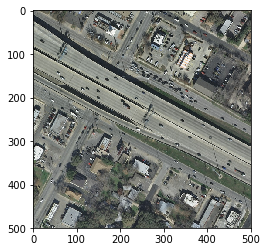

In [40]:
imshow(imgs[0][1])
fst_img=imgs[0][1]
print(fst_img.max())
Image.fromarray(fst_img).save("tmp_img.jpg")

(500, 500)


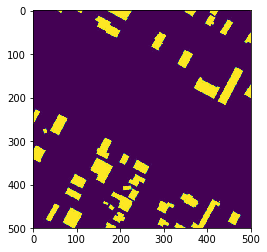

In [41]:
imshow(gts[0][1])
print(gts[0][1].shape)
fst_gt=gts[0][1]
Image.fromarray(fst_gt).save("tmp_gt.jpg")

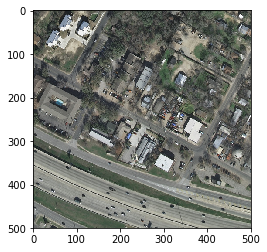

In [37]:
imshow(imgs[1][1])

## Sauvegarde des nouvelles images

In [49]:
def save_files(path, to_save):
    for n,img in to_save:
        Image.fromarray(img).save(join(path,n))

In [50]:
def split_save_imgs(path, img_tuple_list, split_size):
    res = []
    for i in img_tuple_list:
        save_files(path, split_one_image(i, split_size))

In [51]:
dir_splitted_img = "./train/images_splitted"
dir_splitted_gt = "./train/gt_splitted"

makedirs(dir_splitted_img)
makedirs(dir_splitted_gt)

split_save_imgs(dir_splitted_img, sorted_train_img, size_split)
split_save_imgs(dir_splitted_gt, sorted_train_gt, size_split)